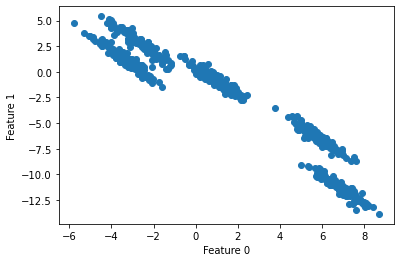

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [2]:
y

array([1, 4, 3, 4, 4, 1, 4, 2, 4, 0, 1, 0, 3, 0, 3, 3, 2, 2, 0, 4, 1, 2,
       3, 3, 2, 0, 3, 4, 2, 0, 1, 4, 1, 3, 3, 4, 4, 3, 2, 0, 4, 1, 2, 3,
       0, 2, 4, 4, 2, 3, 2, 3, 2, 4, 1, 4, 0, 1, 0, 4, 4, 0, 0, 1, 4, 0,
       0, 0, 1, 1, 3, 2, 4, 3, 1, 1, 3, 3, 1, 0, 1, 4, 1, 4, 1, 2, 4, 1,
       2, 0, 0, 3, 2, 4, 4, 2, 4, 2, 4, 2, 4, 1, 2, 2, 4, 3, 0, 3, 4, 2,
       0, 2, 2, 2, 2, 2, 3, 1, 2, 1, 4, 3, 3, 0, 0, 4, 1, 3, 2, 3, 2, 3,
       2, 2, 0, 2, 3, 1, 0, 2, 1, 2, 3, 0, 3, 2, 4, 4, 3, 3, 4, 0, 4, 0,
       3, 2, 3, 0, 1, 4, 0, 2, 1, 2, 4, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 4,
       3, 2, 1, 1, 4, 2, 1, 2, 1, 4, 0, 2, 1, 1, 2, 4, 1, 4, 1, 1, 1, 1,
       3, 1, 1, 2, 3, 1, 2, 2, 0, 0, 2, 0, 0, 3, 3, 2, 0, 4, 1, 0, 2, 0,
       2, 1, 1, 4, 2, 0, 2, 3, 3, 2, 3, 1, 4, 3, 1, 1, 0, 0, 2, 3, 1, 3,
       0, 0, 3, 0, 4, 0, 0, 4, 4, 0, 3, 1, 4, 4, 1, 1, 4, 4, 0, 1, 0, 4,
       0, 3, 1, 2, 3, 1, 0, 3, 0, 2, 3, 1, 2, 1, 0, 1, 3, 4, 3, 3, 3, 1,
       2, 0, 3, 2, 4, 4, 4, 3, 4, 2, 4, 2, 1, 4, 0,

Text(0, 0.5, 'Feature 1')

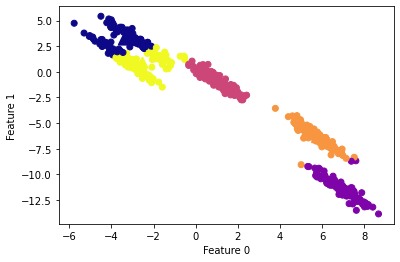

In [2]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

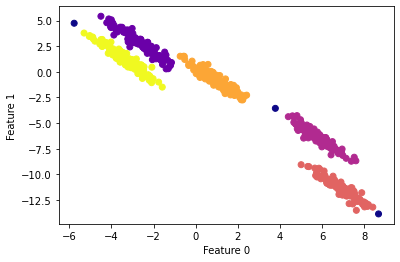

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", round(adjusted_rand_score(y, y_pred),2))

#DBSCAN performance:
print("ARI =", round(adjusted_rand_score(y, clusters),2))


ARI = 0.76
ARI = 0.99


Por último, teniendo en cuenta que creamos los puntos de datos que definen explícitamente 5 clústeres, podemos medir el rendimiento utilizando adjusted_rand_score. Esto no es frecuente, ya que en casos reales no tenemos etiquetas de clúster para empezar (de ahí nuestra necesidad de aplicar técnicas de clúster). Dado que en este caso tenemos etiquetas, podemos medir el rendimiento: